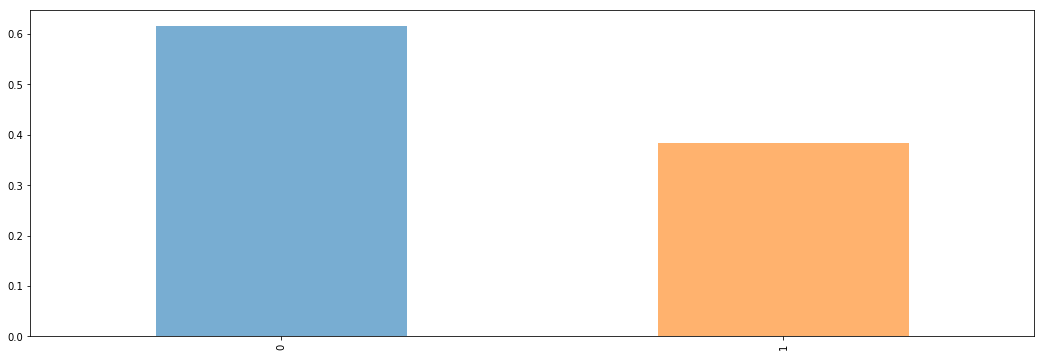

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))
df = pd.read_csv("train.csv")
df.Survived.value_counts(normalize=True).plot(kind = "bar" , alpha = 0.6)
plt.show()

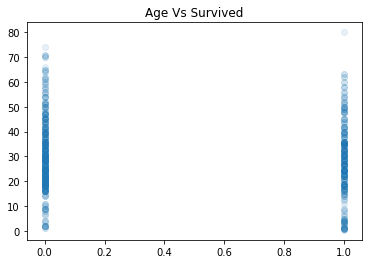

In [8]:
plt.scatter(df.Survived , df.Age , alpha = 0.1)
plt.title("Age Vs Survived")
plt.show()

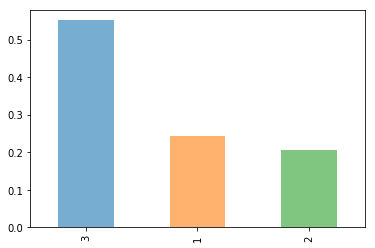

In [11]:
df.Pclass.value_counts(normalize=True).plot(kind = "bar" , alpha = 0.6)
plt.show()

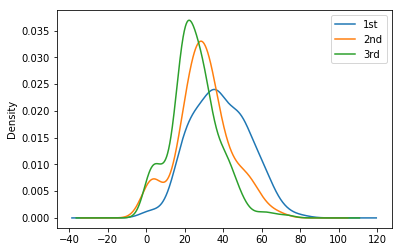

In [25]:
for x in [1,2,3]:
        df.Age[df.Pclass == x].plot(kind = "kde")
plt.legend(("1st","2nd","3rd"))
plt.show()



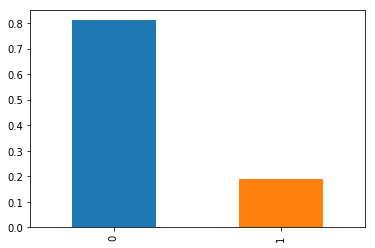

In [29]:
df.Survived[df.Sex == "male"].value_counts(normalize = True).plot(kind = "bar")

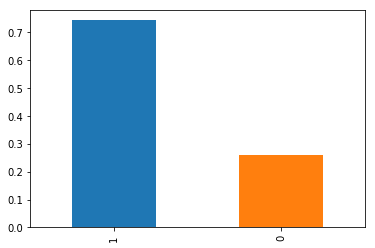

In [31]:
df.Survived[df.Sex == "female"].value_counts(normalize = True).plot(kind = "bar")


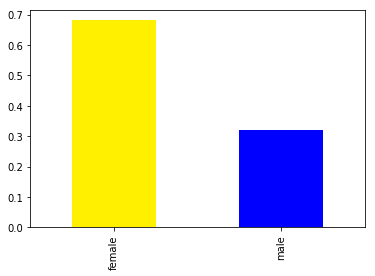

In [40]:
Female_colour = "#fff000"
df.Sex[df.Survived == 1].value_counts(normalize = True).plot(kind = "bar", color = [Female_colour , 'b'])


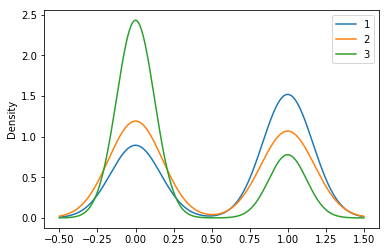

In [44]:
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind = "kde")
plt.legend(("1","2","3"))

Text(0.5, 1.0, 'Rich Men Survival Rate')

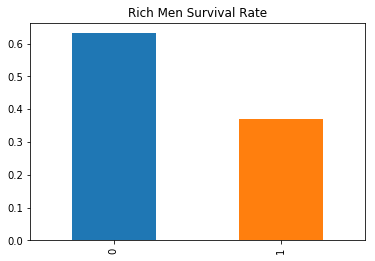

In [47]:
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = "bar")
plt.title("Rich Men Survival Rate")

Text(0.5, 1.0, 'Poor Men Survival Rate')

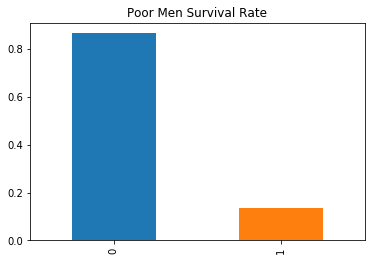

In [49]:
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = "bar")
plt.title("Poor Men Survival Rate")

Text(0.5, 1.0, 'Rich Women Survival Rate')

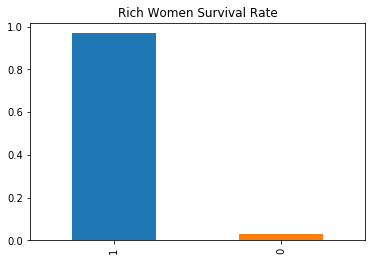

In [53]:
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = "bar")
plt.title("Rich Women Survival Rate")

Text(0.5, 1.0, 'Poor Women Survival Rate')

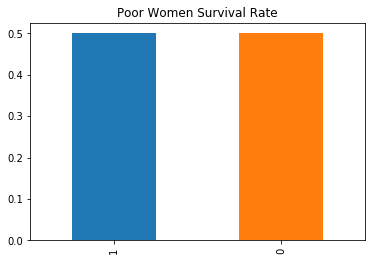

In [54]:
df.Survived[(df.Sex == "female") & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = "bar")
plt.title("Poor Women Survival Rate")

Text(0.5, 1.0, 'Poor Men Survival Rate')

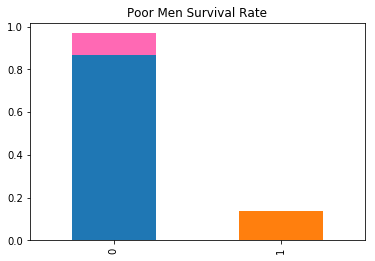

In [56]:
woemn = "#FF69B4"
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = "bar", color = woemn)
plt.title("Rich Women Survival Rate")

df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = "bar")
plt.title("Poor Men Survival Rate")


In [63]:
df["hypo"] = 0
df.loc[df.Sex == "female" ,"hypo"] = 1
df["result"] = 0
df.loc[df.Survived == df.hypo, "result"] = 1
df["result"].value_counts(normalize = True)

1    0.786756
0    0.213244
Name: result, dtype: float64

In [80]:
df["Fare"] = df["Fare"].fillna(df["Fare"].dropna().median())
df["Age"] = df["Age"].fillna(df["Age"].dropna().median())
df.loc[df["Sex"] == "male" ,"Sex"] = 0
df.loc[df["Sex"] == "female" ,"Sex"] = 1
df["Embarked"] = df["Embarked"].fillna("S")
df.loc[df["Embarked"] == "S" , "Embarked"] = 0
df.loc[df["Embarked"] == "C" , "Embarked"] = 1
df.loc[df["Embarked"] == "Q" , "Embarked"] = 2

/home/xerous/anaconda3/envs/my_env/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [109]:

from sklearn import linear_model
test = pd.read_csv("train.csv")
target = df["Survived"].values
feature_names = ["Pclass", "Age" , "Sex" , "SibSp" , "Parch"]
features  = df[features_names].values
classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)
classifier_.score(features, target)


/home/xerous/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7934904601571269

In [111]:
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree = 2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
classifier_.score(poly_features,target)

/home/xerous/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8305274971941639

In [112]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree_ = decision_tree.fit(features , target)

decision_tree_.score(features,target)


0.9169472502805837

In [113]:
from sklearn import model_selection 
scores = model_selection.cross_val_score(decision_tree, features,target , scoring='accuracy' , cv=50)
print(scores)
scores.mean()

[0.77777778 0.72222222 0.77777778 0.88888889 0.77777778 0.77777778
 0.61111111 0.77777778 0.77777778 0.88888889 0.77777778 0.72222222
 0.77777778 0.77777778 0.77777778 0.77777778 0.94444444 0.83333333
 0.83333333 0.88888889 0.94444444 0.72222222 0.83333333 0.77777778
 0.72222222 0.83333333 0.83333333 0.88888889 0.55555556 0.83333333
 0.77777778 0.66666667 0.88888889 0.94444444 0.83333333 0.72222222
 0.66666667 0.72222222 0.83333333 0.88888889 0.88888889 0.83333333
 0.76470588 0.76470588 0.94117647 0.76470588 0.82352941 0.82352941
 0.82352941 0.875     ]


0.8016176470588234

In [124]:
decision_tree1 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 7 , min_samples_split = 2)
decision_tree_1 = decision_tree.fit(features , target)
decision_tree_1.score(features,target)
scores = model_selection.cross_val_score(decision_tree1, features,target , scoring='accuracy' , cv=50)
print(scores)
scores.mean()
print(feature_names)
tree.export_graphviz(decision_tree1,feature_names=features , out_file="tree2.dot")

[0.88888889 0.72222222 0.77777778 0.94444444 0.72222222 0.83333333
 0.55555556 0.77777778 0.77777778 0.94444444 0.83333333 0.77777778
 0.83333333 0.77777778 0.66666667 0.66666667 0.94444444 0.77777778
 0.88888889 0.94444444 0.94444444 0.72222222 0.77777778 0.77777778
 0.77777778 0.77777778 0.83333333 0.83333333 0.61111111 0.88888889
 0.72222222 0.72222222 0.83333333 0.83333333 0.88888889 0.77777778
 0.72222222 0.77777778 0.77777778 0.77777778 0.83333333 0.88888889
 0.76470588 0.88235294 0.76470588 0.76470588 0.76470588 0.82352941
 1.         0.875     ]
['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [131]:
import utils
import numpy as np
import pandas as pd
from sklearn import tree, model_selection

train = pd.read_csv("train.csv")
test = pd.read_csv("train.csv")

print ("\nCleaning up some data")

train["Fare"] = train["Fare"].fillna(train["Fare"].dropna().median())
train["Age"] = train["Age"].fillna(train["Age"].dropna().median())
train.loc[train["Sex"] == "male" ,"Sex"] = 0
train.loc[train["Sex"] == "female" ,"Sex"] = 1
train["Embarked"] = train["Embarked"].fillna("S")
train.loc[train["Embarked"] == "S" , "Embarked"] = 0
train.loc[train["Embarked"] == "C" , "Embarked"] = 1
train.loc[train["Embarked"] == "Q" , "Embarked"] = 2

test["Fare"] = test["Fare"].fillna(test["Fare"].dropna().median())
test["Age"] = test["Age"].fillna(test["Age"].dropna().median())
test.loc[test["Sex"] == "male" ,"Sex"] = 0
test.loc[test["Sex"] == "female" ,"Sex"] = 1
test["Embarked"] = test["Embarked"].fillna("S")
test.loc[test["Embarked"] == "S" , "Embarked"] = 0
test.loc[test["Embarked"] == "C" , "Embarked"] = 1
test.loc[test["Embarked"] == "Q" , "Embarked"] = 2

print ("\nExtracting target and features")

print(train.shape)
target = train["Survived"].values
features = train[["Pclass", "Sex", "Age", "Fare"]].values

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree = decision_tree.fit(features, target)

print(decision_tree.feature_importances_)
print(decision_tree.score(features, target))

print ("\nTry on test set")

test_features = test[["Pclass", "Sex", "Age", "Fare"]].values
prediction = decision_tree.predict(test_features)


print ("\nCorrect overfitting")

feature_names = ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]
features_two = train[feature_names].values
decision_tree_two = tree.DecisionTreeClassifier(
    max_depth = 7,
    min_samples_split = 2,
    random_state = 1)
decision_tree_two = decision_tree_two.fit(features_two, target)

print(decision_tree_two.feature_importances_)
print(decision_tree_two.score(features_two, target))
tree.export_graphviz(decision_tree_two, feature_names=feature_names, out_file="decision_tree_two.dot")

scores = model_selection.cross_val_score(decision_tree_two, features_two, target, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

print ("\nWrite new predicition")

test_features_two = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_two = decision_tree_two.predict(test_features_two)




Cleaning up some data

Extracting target and features
(891, 12)
[0.1269655  0.31274009 0.23147703 0.32881738]
0.9775533108866442

Try on test set

Correct overfitting
[0.16289604 0.13683043 0.47976487 0.14661755 0.04973834 0.01414005
 0.01001273]
0.8787878787878788
[0.74444444 0.85555556 0.74157303 0.86516854 0.88764045 0.80898876
 0.82022472 0.75280899 0.85393258 0.86363636]
0.819397344228805

Write new predicition
